In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools as iter
import sqlite3


UsageError: Line magic function `%` not found.


## 二項分布  
$ P(N) = \begin{pmatrix}n\\N\end{pmatrix}p^N (1-P)^{n-N} $  

The probability density for the binomial distribution is
where n is the number of trials, p is the probability of success, and N is the number of successes.

In [4]:
# numbers: number of trials, probability of each trial
# Parameter of the distribution, >= 0 and <=1.
# size: output shape
def binomial_params(numbers,prob,size):
    return np.random.binomial(n=numbers,p=prob,size=size)
# result of flipping a coin n times, tested size times.

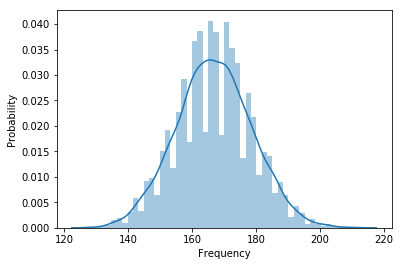

In [8]:
# sample_plot
sns.distplot(binomial_params(1000,1/6,10000))
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.show()

In [13]:
con = sqlite3.connect("sample9_test.db")
cursor = con.cursor()
#cursor.execute("CREATE TABLE data_set_2(original, observe)")
p = "INSERT INTO data_set(original, observe) VALUES(?, ?)"

In [14]:
def calculation(p_array):
    for a_11,a_12,a_21,a_22 in iter.product([-1,0,1],[-1,0,1],[-1,0,1],[-1,0,1]):
        q_11 = p_array[0][0] * a_12 + p_array[0][1] * a_21 + p_array[1][0] * a_22 + p_array[1][1] * a_22
        q_12 = p_array[0][1] * a_12 + p_array[0][2] * a_21 + p_array[1][1] * a_22 + p_array[1][2] * a_22
        q_21 = p_array[1][0] * a_12 + p_array[1][1] * a_21 + p_array[2][0] * a_22 + p_array[2][1] * a_22
        q_22 =p_array[1][1] * a_12 + p_array[1][2] * a_21 + p_array[2][1] * a_22 + p_array[2][2] * a_22
        q_array = np.array([[q_11,q_12],[q_21,q_22]])
        cursor.execute(p, (str(p_array),str(q_array)))
        con.commit()

In [15]:
for p_11,p_12,p_13,p_21,p_22,p_23,p_31,p_32,p_33 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    p_array = np.array([[p_11,p_12,p_13],[p_21,p_22,p_23],[p_31,p_32,p_33]])
    calculation(p_array)

OperationalError: no such table: data_set

In [11]:
def visualize_fixedQ(q_11,q_12,q_21,q_22):
    Q = np.array([[q_11,q_12],[q_21,q_22]])
    data_set =  cursor.execute("select original, observe, count(original) from data_set where observe = '" + str(Q) + "' group by original;").fetchall()
    total = len(data_set)    
    names = [data_set[i][0] for i in range(total)]
    values = [data_set[i][2] for i in range(total)]
    return names,values

In [12]:
visualize_fixedQ(0,2,2,2)[1][0]

NameError: name 'cursor' is not defined

In [153]:
sum(visualize_fixedQ(0,2,2,2)[1])

42

In [157]:
print('names:',visualize_fixedQ(0,2,2,2)[0])
print('values:', visualize_fixedQ(0,2,2,2)[1])

names: ['[[0 0 1]\n [0 0 1]\n [1 1 0]]', '[[0 1 0]\n [0 0 1]\n [1 1 1]]', '[[0 1 1]\n [0 0 1]\n [1 1 1]]', '[[1 0 0]\n [0 1 1]\n [0 1 1]]', '[[1 0 1]\n [0 0 1]\n [1 1 0]]']
values: [18, 6, 6, 6, 6]


In [1]:
# sample plot 
q_11 = visualize_fixedQ(0,2,2,2)[1][0] / sum(visualize_fixedQ(0,2,2,2)[1])
sns.distplot(binomial_params(1000,q_11,10000))
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.style.use('mystyle')
plt.style.use('mystyle')
plt.show()

NameError: name 'visualize_fixedQ' is not defined

## 改善点
p_11, p_12, p_13の要素それぞれを抜き出せるようにする必要性あり。